# The Battle of the Neighborhoods - Week 1
## Introduction & Business Problem :
### Problem Background:
New York is the city with most quantity of people in the United States. One of its major perks is that it is multicultural and a lot of people from different countries access to the chance of the american dream. It provides great business opportinities and cultural experience as well. 
Also, the city is a major center for different sectors such as financial, retail, international commerce, tourism, fashion, arts (and others) in the US.

This also means that the market is highly competitive and expensive. That's why every possible new business venture evaluate the revenue to see if they could survive with that high costs. In this lab, we are going to expose some insights regarding the costs of investing on venues on this market.

### Problem Description:
New York is well known for its cuisine, that has a unique influence by a great variety of international cuisine. For possible new venues, depending on the core value of the business, the main differences or similarities with other brands thoroughly evaluated.

The strategy plan can consider the quantity of people that lives nearby, the quality of other venues in the zone, the type of food, the area mood, etc.

Also, additional variables should be analyzed befare any decision is made:

Demographics, Population, possible provider (Freshmarkets, Wholesale locations)
Concurrence of the venues
Competitors rate
Segmentation of the Borough
Untapped or Saturated markets etc

Eventhough well funded XYZ Company Ltd. is going to select the best location fit to start its first venture.If this is successful they can replicate the same in other locations. 
As they are building their brand, the results of the performance of this first restaurant will be highly impactfull 

### Target Audience:
To recommend the correct location, XYZ Company has appointed me to lead of the Data Science team. The objective is to recommend to the management which NY neighborhood will be best fit to open their restaurant.

This would be of interest of anyone looking to open a food related company in New York

## Success Criteria:
The success criteria of this project will be a good recommendation of borough/Neighborhood choice to XYZ Company Ltd based on Lack of such restaurants in that location and nearest suppliers of ingredients, eith a high level of significance.

### Data we will use:

We will be using the following datasets for analysing New York city

##### Data 1 : 
Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

This dataset exists for free on the web. Link to the dataset is : https://geo.nyu.edu/catalog/nyu_2451_34572

##### Data 2
Second data which will be used is the DOHMH Farmers Markets and Food Boxes dataset. In this we will be using the data of Farmers Markets.

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

Website-https://www.grownyc.org/greenmarketco/foodbox
GrowNYC's Fresh Food Box Program is a food access initiative that enables under-served communities to purchase fresh, healthy, and primarily regionally grown produce well below traditional retail prices.

A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.

##### Data 3
 For the below analysis we will get data from the web as given below :

New York Population
New York City Demographics
Cuisine of New York city
https://en.wikipedia.org/wiki/New_York_City
https://en.wikipedia.org/wiki/Economy_of_New_York_City
https://en.wikipedia.org/wiki/Portal:New_York_City
https://en.wikipedia.org/wiki/Cuisine_of_New_York_City
https://en.wikipedia.org/wiki/List_of_Michelin_starred_restaurants_in_New_York_City

##### Data 4
Newyork city geographical coordinates data will be utilized as input from Foursquare API, that will be leveraged to provision venues information for each neighborhood.We will use the Foursquare API to explore neighborhoods in New York City. The below is image of the Foursquare API data.
Data 3 : For the below analysis we will get data from wikipedia as given below :

New York Population
New York City Demographics
Cuisine of New York city
https://en.wikipedia.org/wiki/New_York_City
https://en.wikipedia.org/wiki/Economy_of_New_York_City
https://en.wikipedia.org/wiki/Portal:New_York_City
https://en.wikipedia.org/wiki/Cuisine_of_New_York_City
https://en.wikipedia.org/wiki/List_of_Michelin_starred_restaurants_in_New_York_City

In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
# Download the dataset and read it into a pandas dataframe.

# The Arrondissements dataset was downloaded from Paris|DATA:  https://opendata.paris.fr/explore/dataset/arrondissements/table/?dataChart
# Then placed on the GitHub repo for the project.
# https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv

paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [3]:
# Rename the necessary columns 'Geometry_X and Geometry_Y' etc...

# District : name of the central District for the Arrondissement
# Arrondissement : the Arrondissement or district number which is used to identify it
# Arrondissement_Fr : the descriptive French label for each Arrondissement

paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [4]:
# Clean up the dataset to remove unnecessary columns.
# Some of the columns are for mapping software - not required here.

paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


In [5]:
# Check the shape of the dataframe
paris.shape

(20, 5)

In [6]:
# Retrieve the Latitude and Longitude for Paris
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [7]:
# create map of Paris using the above latitude and longitude values
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [9]:
# Use the Foursquare API to explore the Arrondissements of Paris (Neighborhoods)¶
# Define Foursquare Credentials and Version

CLIENT_ID='WK0NAVW0MOW2YFKASDECKIIGRTN34WDSPSLGOTEHA1R2LO5D'
CLIENT_SECRET='MGXIVDFRHPN5C1JXRHMNM5DIWL3PA5LKQUGH3JH4B0LRW4RB'
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WK0NAVW0MOW2YFKASDECKIIGRTN34WDSPSLGOTEHA1R2LO5D
CLIENT_SECRET:MGXIVDFRHPN5C1JXRHMNM5DIWL3PA5LKQUGH3JH4B0LRW4RB


In [10]:

# Explore the first Neighborhood in our dataframe.
# Get the Neighborhood's French name.

paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

'3eme Ardt'

In [11]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=WK0NAVW0MOW2YFKASDECKIIGRTN34WDSPSLGOTEHA1R2LO5D&client_secret=MGXIVDFRHPN5C1JXRHMNM5DIWL3PA5LKQUGH3JH4B0LRW4RB&v=20180604&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [13]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e96819029ce6a001b59dade'},
 'response': {'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 84,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.86391016055883,
          'lng': 2.360590696334839}],
        'distance': 123,
        'postalCode': '75003',
        '

In [14]:
# define a function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
2,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
3,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
4,Le Burger Fermier des Enfants Rouges,Burger Joint,48.862831,2.362073
5,Square du Temple,Park,48.864475,2.360816
6,Fromagerie Jouannault,Cheese Shop,48.862947,2.362530
7,Hôtel Jules & Jim,Hotel,48.863496,2.357395
8,Les Enfants Rouges,Wine Bar,48.863013,2.361260
9,Chez Taeko,Japanese Restaurant,48.862734,2.362136


In [16]:

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

84 venues were returned by Foursquare.


In [17]:
#Create a nearby venues function for all the neighborhoods in Paris

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:

# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [19]:
print(paris_venues.shape)
paris_venues.head(250)

(1259, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
2,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
3,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
4,3eme Ardt,48.862872,2.360001,Le Burger Fermier des Enfants Rouges,48.862831,2.362073,Burger Joint
...,...,...,...,...,...,...,...
245,10eme Ardt,48.876130,2.360728,Shouk,48.871820,2.362610,Israeli Restaurant
246,10eme Ardt,48.876130,2.360728,Le Poutch,48.871917,2.360510,Café
247,10eme Ardt,48.876130,2.360728,O.B.U (Organisation des Burgers Unis),48.879216,2.362940,Burger Joint
248,10eme Ardt,48.876130,2.360728,Hubert,48.873848,2.355068,French Restaurant


In [20]:

paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,69,69,69,69,69,69
12eme Ardt,5,5,5,5,5,5
13eme Ardt,60,60,60,60,60,60
14eme Ardt,26,26,26,26,26,26
15eme Ardt,63,63,63,63,63,63
16eme Ardt,13,13,13,13,13,13
17eme Ardt,59,59,59,59,59,59
18eme Ardt,40,40,40,40,40,40


In [22]:
#Calculate how many unique venue categories there are
# Calculate how many unique categories there are.
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique()))

SyntaxError: unexpected EOF while parsing (<ipython-input-22-02c634152316>, line 3)

In [23]:

# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1255,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1256,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1257,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# The shape of the dataframe is
paris_onehot.shape

(1259, 198)

In [25]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.020000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.000000,0.010000,0.00,0.000000,0.000000,0.010000,0.020000,0.000000,0.0,0.0
1,11eme Ardt,0.014493,0.000000,0.000000,0.00,0.000000,0.000000,0.014493,0.000000,0.014493,...,0.000000,0.014493,0.00,0.014493,0.014493,0.043478,0.000000,0.014493,0.0,0.0
2,12eme Ardt,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.2
3,13eme Ardt,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.200000,...,0.000000,0.000000,0.00,0.000000,0.216667,0.000000,0.000000,0.000000,0.0,0.0
4,14eme Ardt,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,15eme Ardt,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.015873,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.015873,0.015873,0.0,0.0
6,16eme Ardt,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.076923,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,17eme Ardt,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.016949,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,18eme Ardt,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.025000,0.025000,0.000000,0.000000,0.0,0.0
9,19eme Ardt,0.000000,0.023256,0.023256,0.00,0.000000,0.000000,0.000000,0.000000,0.023256,...,0.000000,0.000000,0.00,0.000000,0.023256,0.000000,0.000000,0.000000,0.0,0.0


In [26]:

# The shape of the grouped data is
paris_grouped.shape

(20, 198)

In [27]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.13
1                Hotel  0.05
2          Coffee Shop  0.05
3                 Café  0.04
4               Bistro  0.04
5    Indian Restaurant  0.04
6                  Bar  0.03
7  Japanese Restaurant  0.03
8          Pizza Place  0.03
9    Korean Restaurant  0.02


----11eme Ardt----
                 venue  freq
0    French Restaurant  0.10
1          Supermarket  0.06
2           Restaurant  0.06
3          Pastry Shop  0.04
4                  Bar  0.04
5             Wine Bar  0.04
6  Japanese Restaurant  0.03
7               Bakery  0.03
8   Italian Restaurant  0.03
9          Pizza Place  0.03


----12eme Ardt----
                     venue  freq
0              Zoo Exhibit   0.2
1                     Park   0.2
2                      Zoo   0.2
3      Monument / Landmark   0.2
4              Supermarket   0.2
5              Music Store   0.0
6  New American Restaurant   0.0
7                Nightclub   0.0
8   

In [28]:

# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Hotel,Coffee Shop,Bistro,Indian Restaurant,Café,Japanese Restaurant,Bar,Pizza Place,Seafood Restaurant
1,11eme Ardt,French Restaurant,Restaurant,Supermarket,Bar,Wine Bar,Pastry Shop,Pizza Place,Cocktail Bar,Theater,Japanese Restaurant
2,12eme Ardt,Zoo Exhibit,Zoo,Supermarket,Park,Monument / Landmark,Dive Bar,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Japanese Restaurant,Cosmetics Shop,Metro Station,Sandwich Place
4,14eme Ardt,French Restaurant,Pizza Place,Hotel,Supermarket,Bakery,Brasserie,Food & Drink Shop,Bistro,Sushi Restaurant,Tea Room
5,15eme Ardt,French Restaurant,Hotel,Italian Restaurant,Coffee Shop,Lebanese Restaurant,Bakery,Park,Brasserie,Thai Restaurant,Supermarket
6,16eme Ardt,Park,Plaza,Lake,Pool,Bus Stop,Bus Station,Trail,Boat or Ferry,Art Museum,French Restaurant
7,17eme Ardt,French Restaurant,Hotel,Japanese Restaurant,Italian Restaurant,Café,Plaza,Bakery,Bistro,Korean Restaurant,Mediterranean Restaurant
8,18eme Ardt,Bar,French Restaurant,Convenience Store,Coffee Shop,Restaurant,Seafood Restaurant,Beer Store,Bistro,Fast Food Restaurant,Middle Eastern Restaurant
9,19eme Ardt,Bar,French Restaurant,Supermarket,Hotel,Bistro,Seafood Restaurant,Beer Bar,Martial Arts Dojo,Burger Joint,Music Store


In [30]:

# The shape of the sorted data is
paris_venues_sorted.shape

(20, 11)

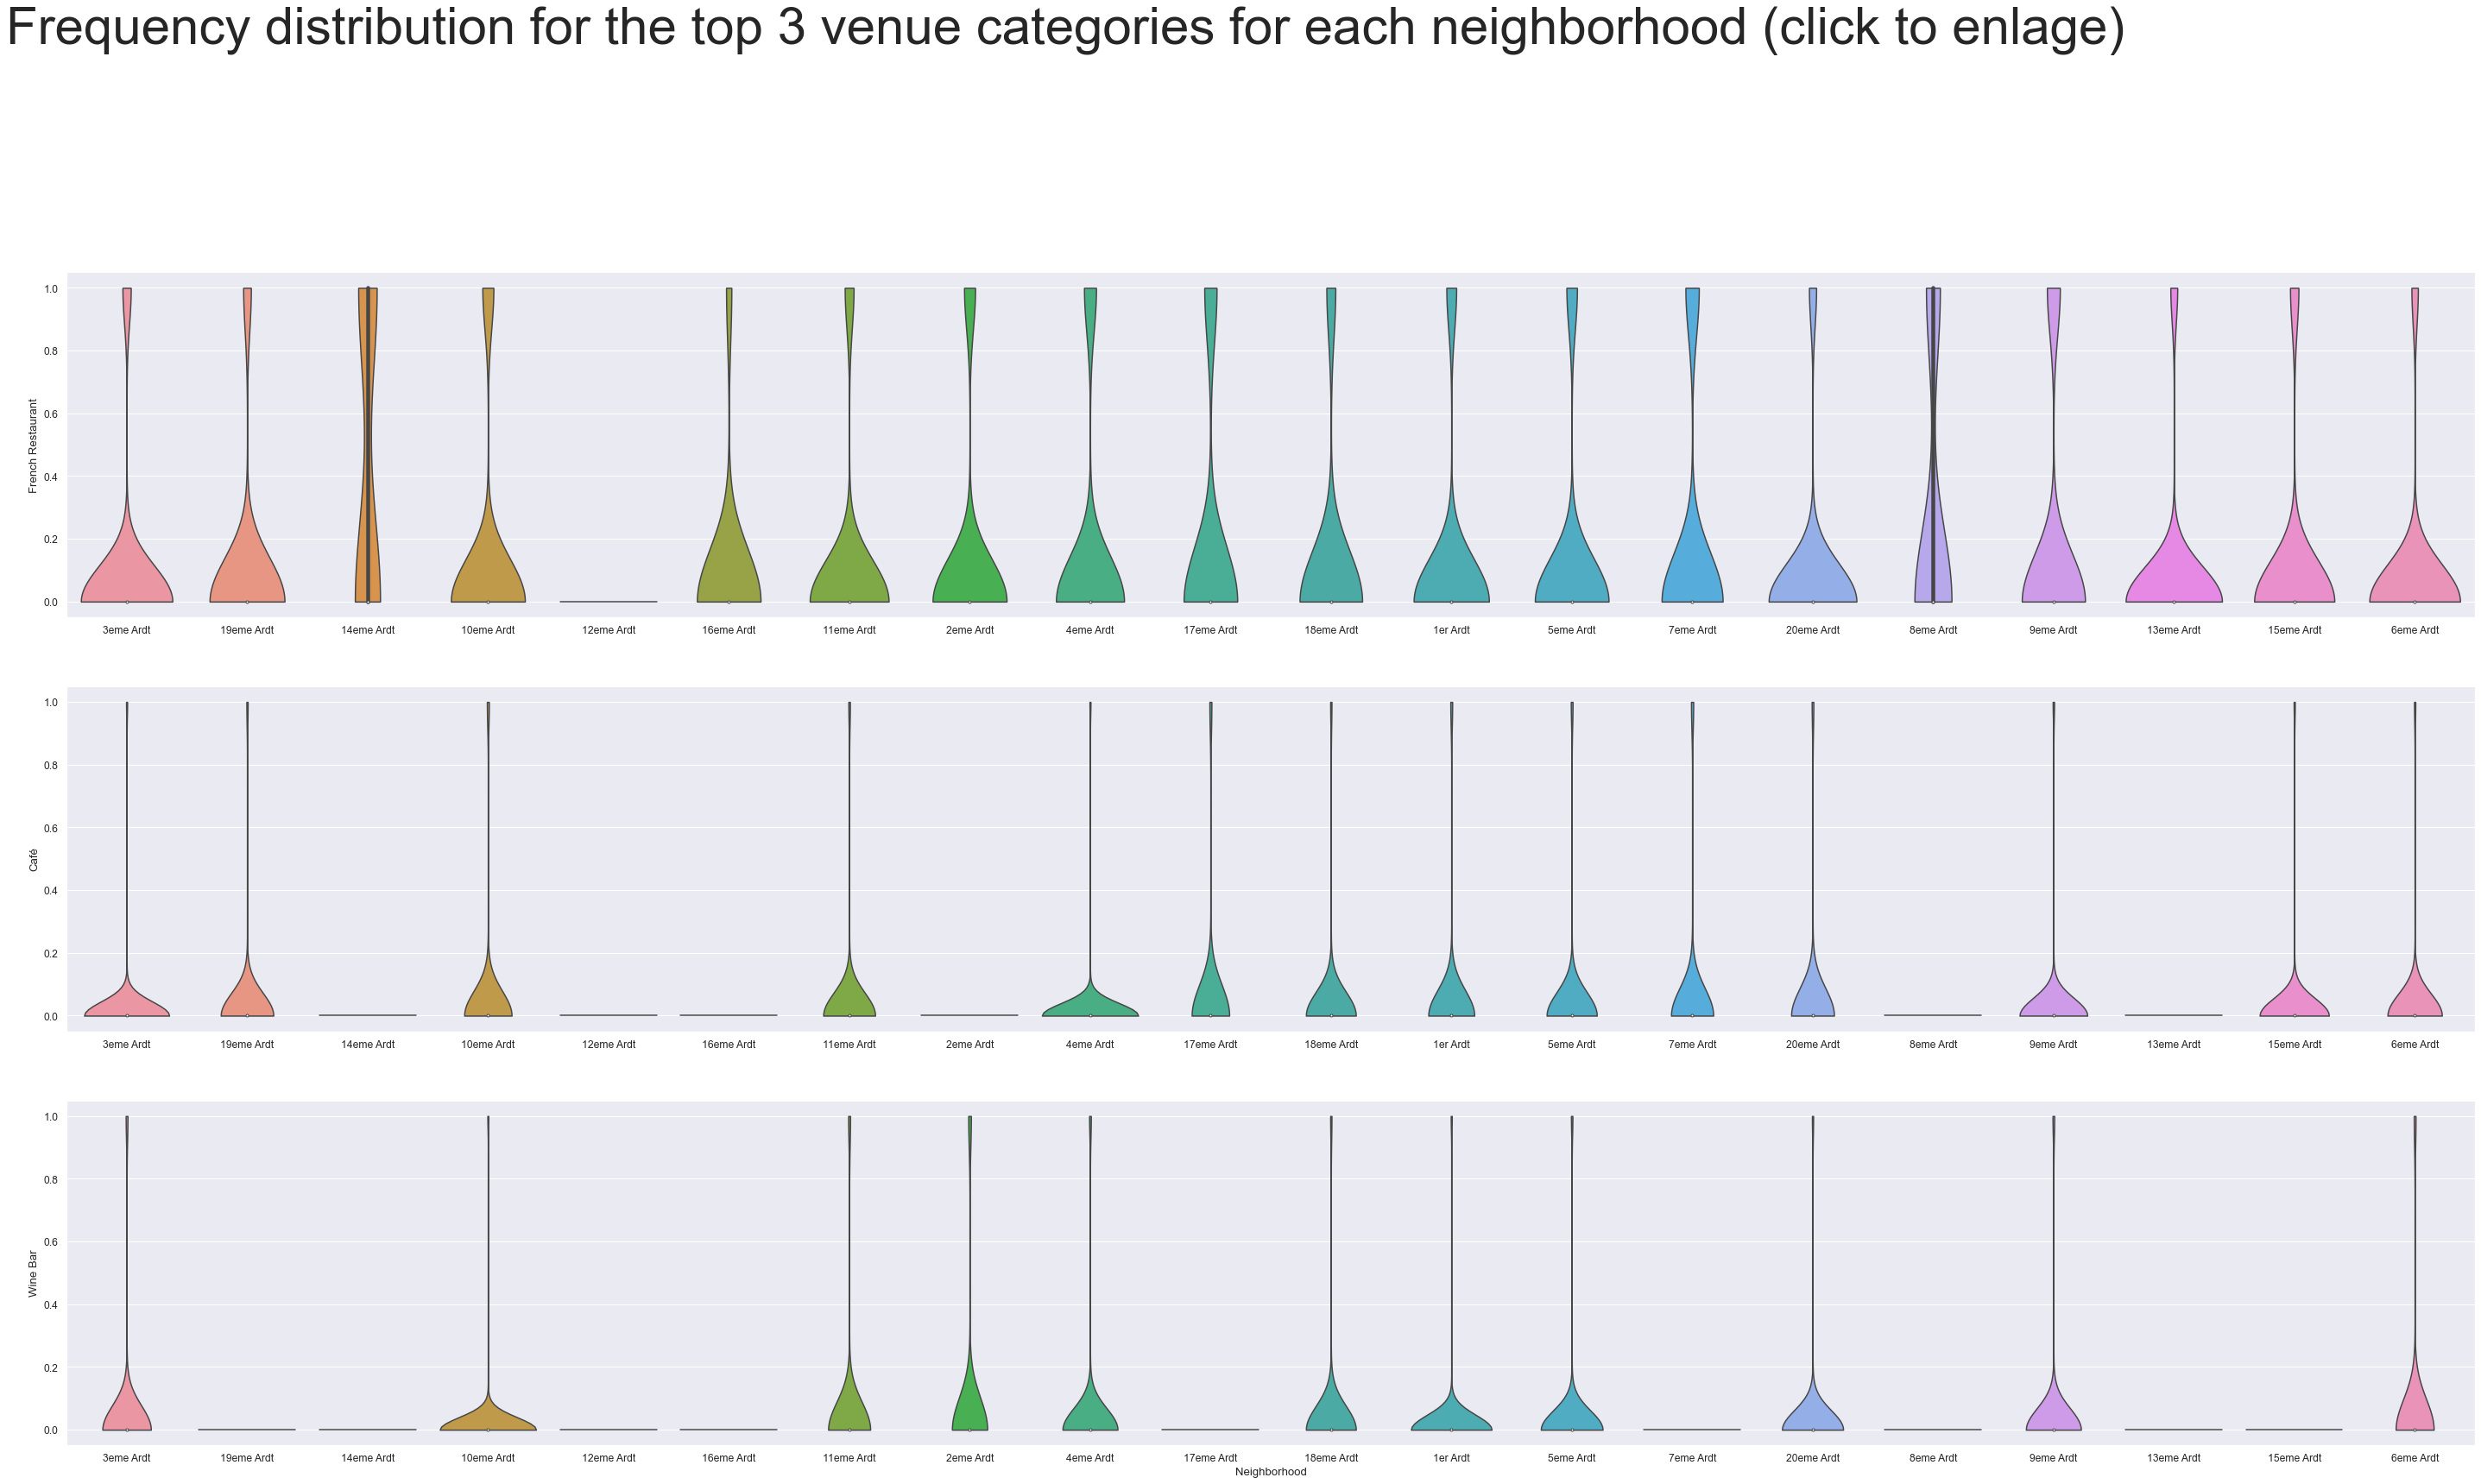

In [31]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

So as we can see from the analysis there are 8 neighborhoods to open new stores - according to the criteria that they have the 3 specified venues in a great frequency (French Restaurants, Cafés and Wine Bars). They are as follows:

Neighborhoods

3eme Ardt
10eme Ardt
11eme Ardt
4eme Ardt
18eme Ardt
18eme Ardt
5eme Ardt
9eme Ardt
6eme Ardt
Let's take this further with some exploration and Inferential Analysis
We have the 8 neighborhoods that all include the venue category criteria.
But if we included the 'Clothing_Store" venue category into the analysis, then we might be able to make some inferences based on the data, and domain knowledge of marketing and the industry, to focus the list.

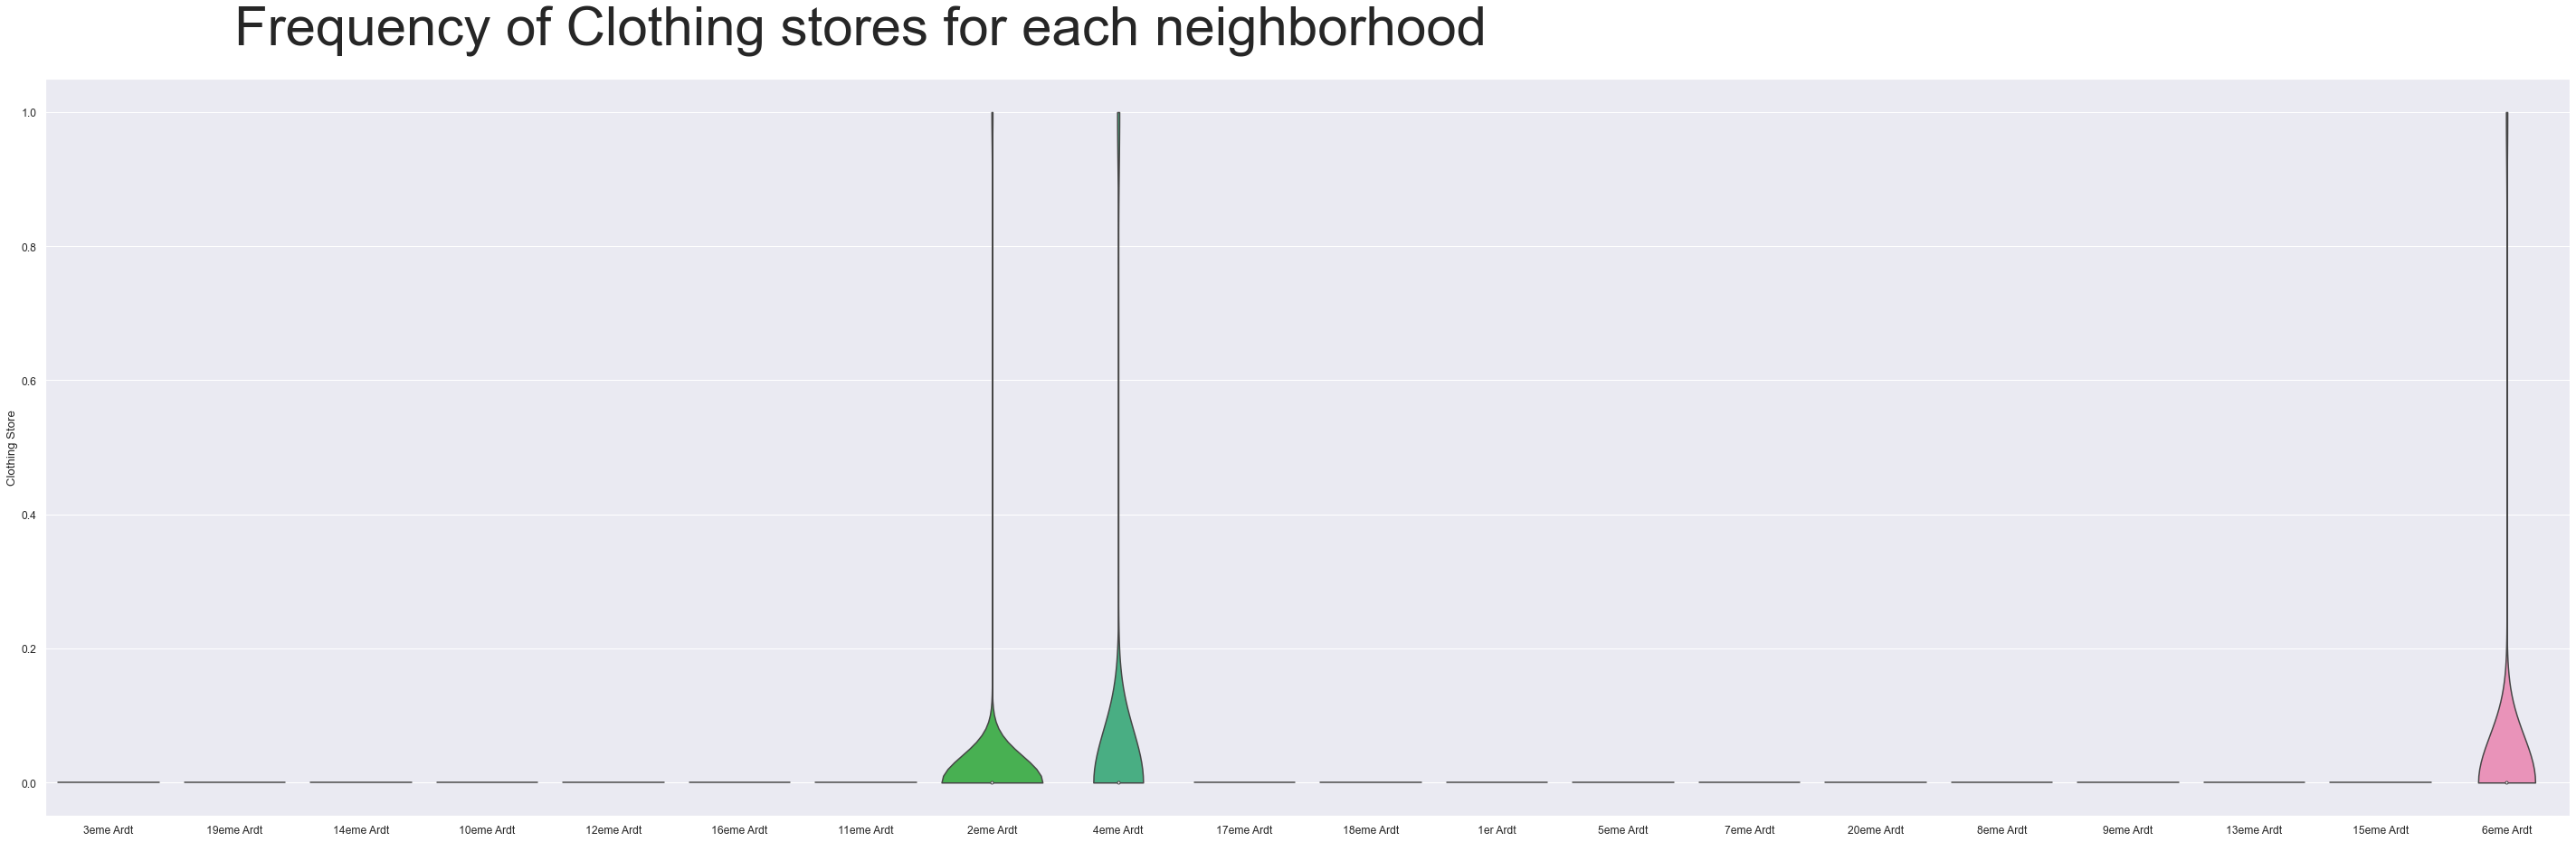

In [33]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

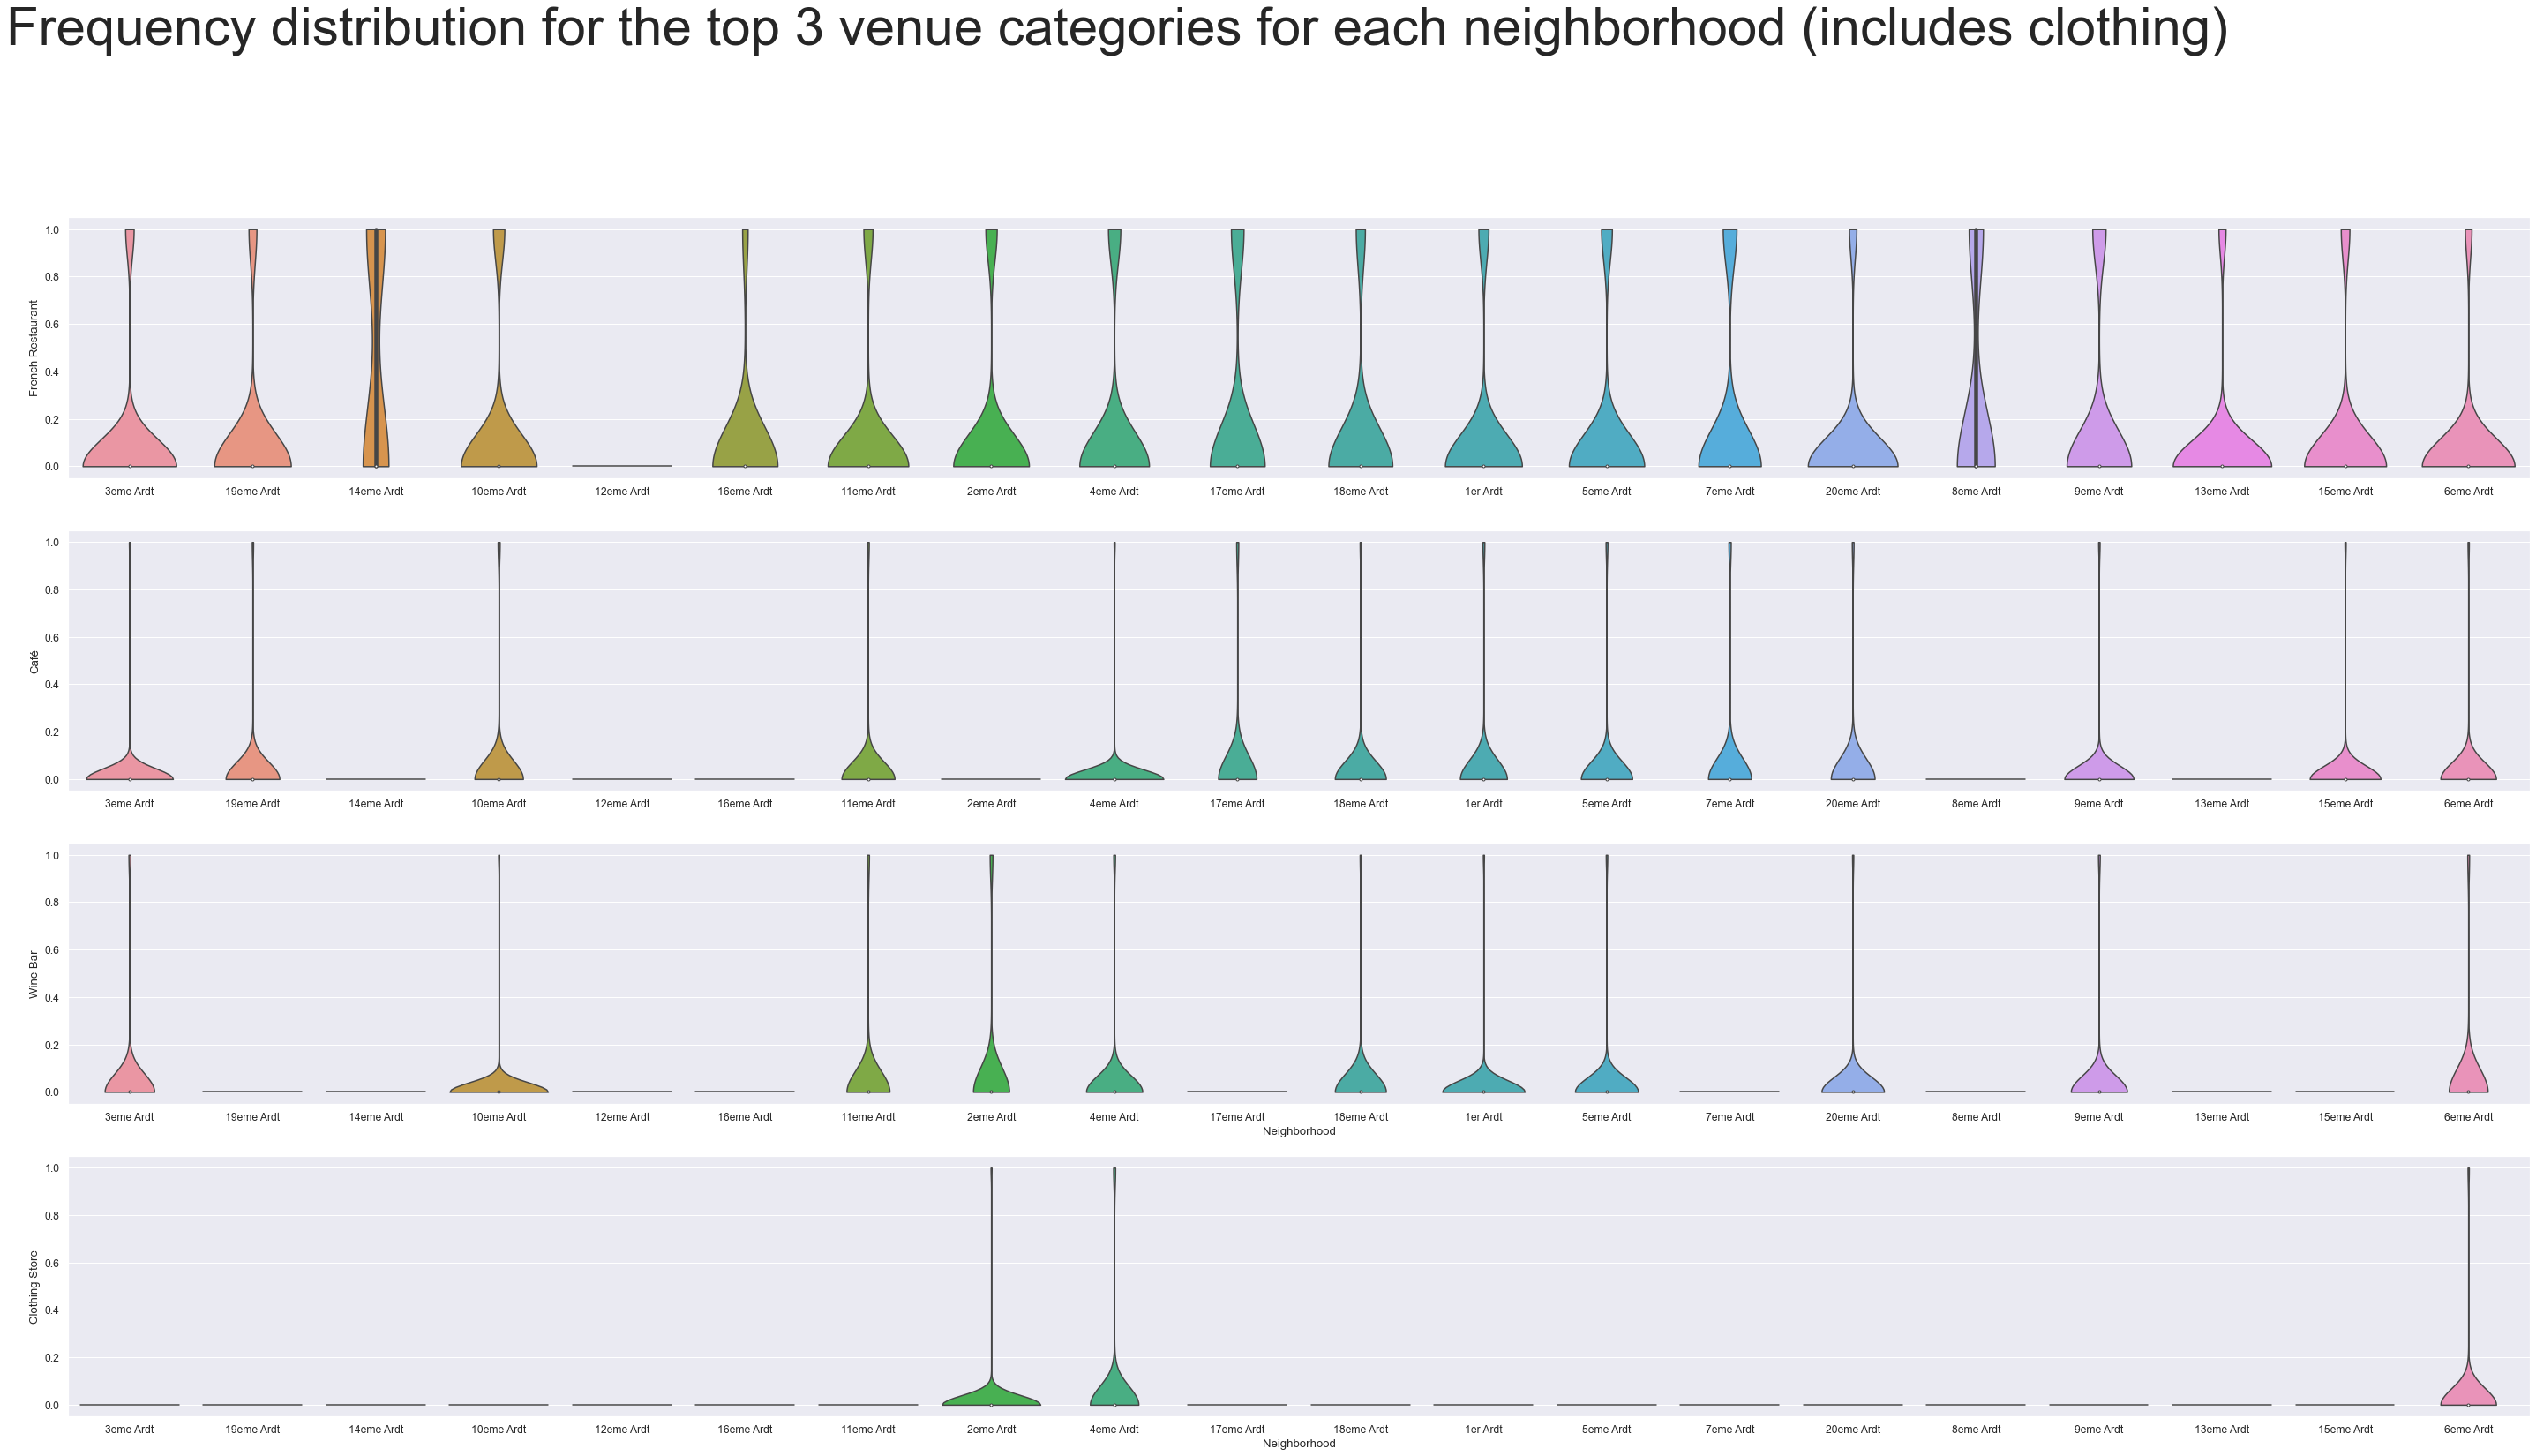

In [34]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()